In [7]:
import pandas as pd 
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [51]:
movies = pd.read_csv('movies.csv', encoding = "ISO-8859-1")

In [40]:
movies.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [10]:
#Checking for missing data

for col in movies.columns:
    pct_missing = np.mean(movies[col].isnull())
    print('{} - {}%'.format(col, pct_missing))
    

budget - 0.0%
company - 0.0%
country - 0.0%
director - 0.0%
genre - 0.0%
gross - 0.0%
name - 0.0%
rating - 0.0%
released - 0.0%
runtime - 0.0%
score - 0.0%
star - 0.0%
votes - 0.0%
writer - 0.0%
year - 0.0%


In [12]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6820 entries, 0 to 6819
Data columns (total 15 columns):
budget      6820 non-null float64
company     6820 non-null object
country     6820 non-null object
director    6820 non-null object
genre       6820 non-null object
gross       6820 non-null float64
name        6820 non-null object
rating      6820 non-null object
released    6820 non-null object
runtime     6820 non-null int64
score       6820 non-null float64
star        6820 non-null object
votes       6820 non-null int64
writer      6820 non-null object
year        6820 non-null int64
dtypes: float64(3), int64(3), object(9)
memory usage: 799.3+ KB


In [20]:
#Changing the numeric type for float to int. 

movies['budget'] = movies['budget'].astype('int64')

movies['gross'] = movies['gross'].astype('int64')

In [21]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6820 entries, 0 to 6819
Data columns (total 16 columns):
budget            6820 non-null int64
company           6820 non-null object
country           6820 non-null object
director          6820 non-null object
genre             6820 non-null object
gross             6820 non-null int64
name              6820 non-null object
rating            6820 non-null object
released          6820 non-null object
runtime           6820 non-null int64
score             6820 non-null float64
star              6820 non-null object
votes             6820 non-null int64
writer            6820 non-null object
year              6820 non-null int64
actual release    6820 non-null object
dtypes: float64(1), int64(5), object(10)
memory usage: 852.6+ KB


In [13]:
movies['actual release'] = movies['released'].astype(str).str[:4]

In [15]:
movies.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,actual release
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,1986


In [53]:
movies.sort_values(by=['gross'], inplace=False, ascending=False).head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
6380,245000000.0,Lucasfilm,USA,J.J. Abrams,Action,936662225.0,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015
5061,237000000.0,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625.0,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,954412,James Cameron,2009
2420,200000000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302.0,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997
6391,150000000.0,Universal Pictures,USA,Colin Trevorrow,Action,652270625.0,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,469200,Rick Jaffa,2015
5723,220000000.0,Marvel Studios,USA,Joss Whedon,Action,623357910.0,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012


In [22]:
pd.set_option('display.max_rows', None)

In [24]:
#Hypothesis 
#Greater the budget, the greater the gross
#The bigger companies will generate higher grosses
#Steven Spielberg & George Lucas

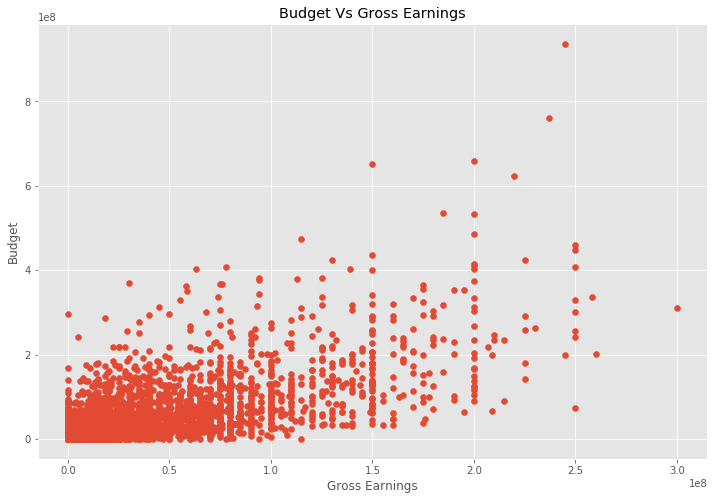

In [27]:
plt.scatter(x=movies['budget'], y=movies['gross'])
plt.title('Budget Vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget')
plt.show()

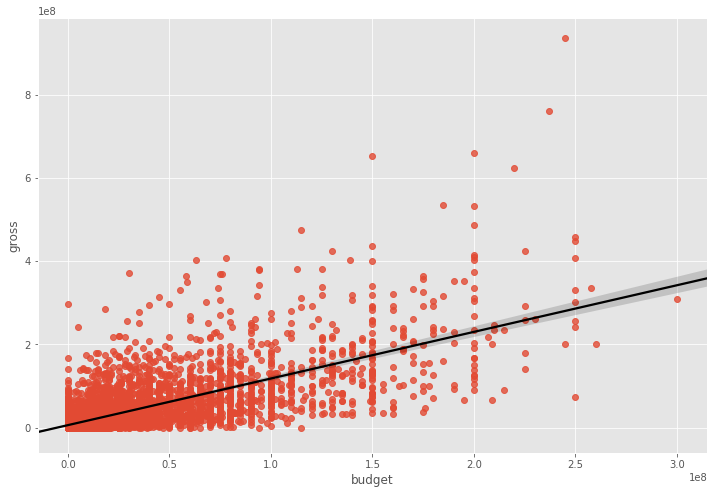

In [31]:
sns.regplot(data=movies, x='budget', y='gross', line_kws={"color":"black"})

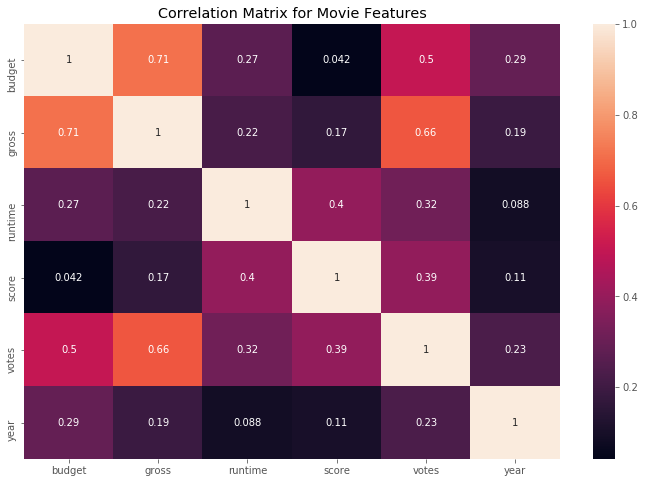

In [36]:
sns.heatmap(movies.corr(), annot=True)
plt.title("Correlation Matrix for Movie Features");

I want to change the object columns in the movies dataset to a numerical data type to allow us to see
if there's any correlation between director & company and gross earnings.

In [49]:
movies_numeric = movies

for col_name in movies_numeric.columns:
    if (movies_numeric[col_name].dtype == 'object'):
        movies_numeric[col_name] = movies_numeric[col_name].astype('category')
        movies_numeric[col_name] = movies_numeric[col_name].cat.codes
        
movies_numeric.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,665,54,2192,1,52287414.0,4661,8,39,89,8.1,2454,299174,3716,1986
1,6000000.0,1680,54,1296,4,70136369.0,1821,7,27,103,7.8,1605,264740,1970,1986
2,15000000.0,1680,54,2645,0,179800601.0,6203,6,23,110,6.9,2345,236909,1852,1986
3,18500000.0,2062,54,1066,0,85160248.0,295,8,33,137,8.4,2192,540152,1629,1986
4,9000000.0,2122,54,2123,1,18564613.0,1872,6,36,90,6.9,1139,36636,2549,1986


In [52]:
movies.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


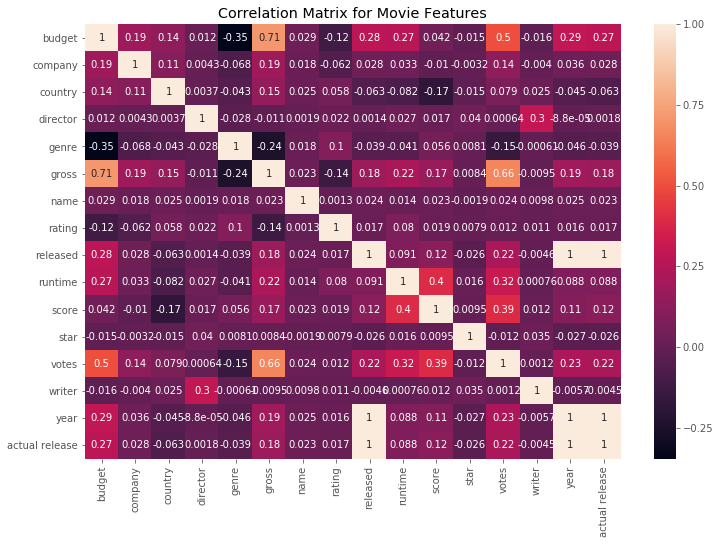

In [44]:
sns.heatmap(movies_numeric.corr(), annot=True)
plt.title("Correlation Matrix for Movie Features");

In [55]:
corr_mat = movies_numeric.corr()

corr_pairs = corr_mat.unstack()

corr_pairs.head(10)

budget  budget      1.000000
        company     0.187205
        country     0.137635
        director    0.011602
        genre      -0.346794
        gross       0.712196
        name        0.028712
        rating     -0.119660
        released    0.276635
        runtime     0.268226
dtype: float64

In [56]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs.head(10)

budget   genre     -0.346794
genre    budget    -0.346794
         gross     -0.242676
gross    genre     -0.242676
country  score     -0.174414
score    country   -0.174414
votes    genre     -0.150519
genre    votes     -0.150519
rating   gross     -0.135538
gross    rating    -0.135538
dtype: float64

In [48]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

votes           budget            0.503924
budget          votes             0.503924
votes           gross             0.662457
gross           votes             0.662457
                budget            0.712196
budget          gross             0.712196
released        year              0.996187
year            released          0.996187
actual release  year              0.996229
year            actual release    0.996229
actual release  released          0.999389
released        actual release    0.999389
budget          budget            1.000000
writer          writer            1.000000
votes           votes             1.000000
star            star              1.000000
score           score             1.000000
runtime         runtime           1.000000
released        released          1.000000
rating          rating            1.000000
name            name              1.000000
gross           gross             1.000000
genre           genre             1.000000
director   

Looking at this project, the hypothesis that the higher the budget the higher the gross was true
but the director and the company had little correlation to the success of the film in regards to 
it's gross earnings. 

What I learnt through this process was that there was a high correlation between votes and gross.
What I can take from this, is perhaps that after cinema goers saw the film, they rated the film and
this had an impact on people who perhaps were undecided on the film or were thinking about seeing the film,
to actually go to the theatres and see the film.

Film companies could perhaps increase engagement with the public and get them to actually rate the film
or comment on the film. This could potentially boost gross earnings.

